# LV1 – Obrada teksta i Part-of-Speech (POS) označavanje
### Laboratorijska vježba 1
**Tema:** Osnove obrade prirodnog jezika pomoću biblioteka spaCy i NLTK

Ovaj notebook sadrži teorijski uvod, osnovne korake obrade teksta te zadatke za samostalni rad. Studenti mogu birati žele li koristiti *spaCy* ili *NLTK* biblioteku pri rješavanju zadataka.

## Ciljevi vježbe
- Upoznati osnovne korake obrade prirodnog jezika (NLP).
- Primijeniti biblioteke **spaCy** i **NLTK** na obradu teksta.
- Razumjeti i implementirati procese tokenizacije, uklanjanja zaustavnih riječi, lematizacije i POS označavanja.
- Razviti sposobnost analize i interpretacije rezultata obrade teksta.

## 1. Instalacija potrebnih biblioteka

In [1]:
!pip install spacy nltk matplotlib pandas

!python -m spacy download en_core_web_sm

import spacy
from spacy.lang.en.stop_words import STOP_WORDS

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag

from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt

  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.8.0/en_core_web_sm-3.8.0-py3-none-any.whl (12.8 MB)
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


## 2. Tokenizacija
**Opis:** Tokenizacija je proces razdvajanja teksta na manje jedinice – tokene (riječi, interpunkcijske znakove itd.).

U nastavku su prikazana dva načina tokenizacije: pomoću *spaCy* i pomoću *NLTK*.

In [2]:
nlp = spacy.load('en_core_web_sm')
text = 'Natural Language Processing enables computers to understand human language.'
doc = nlp(text)
for token in doc:
    print(token.text)

Natural
Language
Processing
enables
computers
to
understand
human
language
.


In [3]:
nltk.download('punkt')
nltk.download('punkt_tab')
text = 'Natural Language Processing enables computers to understand human language.'
tokens = word_tokenize(text)
print(tokens)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


['Natural', 'Language', 'Processing', 'enables', 'computers', 'to', 'understand', 'human', 'language', '.']


### Zadatak 1
Upiši vlastiti tekst i izvrši tokenizaciju pomoću obje biblioteke.

In [15]:
nlp = spacy.load("en_core_web_sm")

text = "This is my text to demonstrate, my name is Leonardo Ugrešić"

doc = nlp(text)

print("spaCy tokeni:")
for token in doc:
    print(token.text)

spaCy tokeni:
This
is
my
text
to
demonstrate
,
my
name
is
Leonardo
Ugrešić


In [18]:
tokens = word_tokenize(text)
print(tokens)

['This', 'is', 'my', 'text', 'to', 'demonstrate', ',', 'my', 'name', 'is', 'Leonardo', 'Ugrešić']


## 3. Uklanjanje zaustavnih riječi (Stopwords)
Zaustavne riječi su česte riječi koje ne doprinose značenju teksta (npr. the, is, in...).

In [19]:
doc = nlp(text)
filtered_spacy = [token.text for token in doc if not token.is_stop]
print(filtered_spacy)

['text', 'demonstrate', ',', 'Leonardo', 'Ugrešić']


In [20]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
filtered_nltk = [word for word in tokens if word.lower() not in stop_words]
print(filtered_nltk)

['text', 'demonstrate', ',', 'name', 'Leonardo', 'Ugrešić']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Zadatak 2
Ukloni zaustavne riječi iz vlastitog teksta pomoću obje biblioteke.

In [21]:
doc = nlp(text)
filtered_spacy = [token.text for token in doc if not token.is_stop]
print(filtered_spacy)

['text', 'demonstrate', ',', 'Leonardo', 'Ugrešić']


## 4. Lematizacija
Lematizacija svodi riječi na osnovni oblik (lemu).

In [26]:
#Primjer: Lemmatizacija sa spaCy
for token in doc:
    print(f'{token.text:15} → {token.lemma_}')

This            → this
is              → be
my              → my
text            → text
to              → to
demonstrate     → demonstrate
,               → ,
my              → my
name            → name
is              → be
Leonardo        → Leonardo
Ugrešić         → Ugrešić


In [25]:
#Primjer: Lemmatizacija s NLTK
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
pos_tags = pos_tag(tokens)
def get_wordnet_pos(tag):
    if tag.startswith('J'): return wordnet.ADJ
    elif tag.startswith('V'): return wordnet.VERB
    elif tag.startswith('N'): return wordnet.NOUN
    elif tag.startswith('R'): return wordnet.ADV
    else: return wordnet.NOUN
lemmas = [lemmatizer.lemmatize(word, get_wordnet_pos(tag)) for word, tag in pos_tags]
print(lemmas)

['This', 'be', 'my', 'text', 'to', 'demonstrate', ',', 'my', 'name', 'be', 'Leonardo', 'Ugrešić']


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Zadatak 3
Primijeni lematizaciju na vlastiti tekst i usporedi rezultate između spaCy i NLTK.

NLTK zadržava velika slova za razliku od spaCy, is -> be u oba slučaja

## 5. POS (Part-of-Speech) označavanje
POS označavanje dodjeljuje gramatičku ulogu svakoj riječi (imenica, glagol, pridjev, prilog...).

In [27]:
for token in doc:
    print(f'{token.text:15} → {token.pos_:6} ({token.tag_})')

This            → PRON   (DT)
is              → AUX    (VBZ)
my              → PRON   (PRP$)
text            → NOUN   (NN)
to              → PART   (TO)
demonstrate     → VERB   (VB)
,               → PUNCT  (,)
my              → PRON   (PRP$)
name            → NOUN   (NN)
is              → AUX    (VBZ)
Leonardo        → PROPN  (NNP)
Ugrešić         → PROPN  (NNP)


In [28]:
pos_tags = pos_tag(tokens)
for word, tag in pos_tags:
    print(f'{word:15} → {tag}')

This            → DT
is              → VBZ
my              → PRP$
text            → NN
to              → TO
demonstrate     → VB
,               → ,
my              → PRP$
name            → NN
is              → VBZ
Leonardo        → NNP
Ugrešić         → NNP


### Zadatak 4
Izdvoji sve imenice i glagole iz svog teksta pomoću jedne od biblioteka.

Imenice: text, name, Leonardo, Ugrešić

Glagoli: is, demonstrate, is

## 6. Zadaci

## Zadatak 1: Usporedi dva teksta po učestalosti riječi

**Opis:**  
Analiziraj dva različita teksta (npr. jedan o sportu, drugi o tehnologiji).  
Nakon što provedeš tokenizaciju, uklanjanje zaustavnih riječi i lematizaciju, potrebno je:  
- pronaći 5 najčešćih imenica u svakom tekstu,  
- usporediti liste dobivenih imenica,  
- zaključiti o čemu se govori u svakom tekstu.

**Cilj:**  
Razumjeti kako se analiza frekvencije riječi može koristiti za prepoznavanje teme teksta.

**Upute:**  
1. Učitaj dva različita teksta (mogu biti dvije rečenice, dva odlomka ili datoteke).  
2. Obradi svaki tekst (tokenizacija → čišćenje → lematizacija → POS tagging).  
3. Izdvoji samo riječi označene kao NOUN (imenice).  
4. Prebroji pojavljivanja i prikaži 5 najčešćih.  
5. Zaključi koja je tema svakog teksta.

In [31]:
text_sport = """
The team played an intense match last night, delivering one of their strongest performances this season.
Throughout the match, the team demonstrated exceptional teamwork, discipline, and determination.
The coach repeatedly emphasized how important teamwork was for maintaining control during the most difficult moments of the match.
Several players mentioned that the team had trained specifically to improve their teamwork and communication, which clearly paid off.
Fans celebrated loudly after the match, recognizing that the team’s victory was crucial for improving their position in the championship.
During the press conference, the coach praised the players for their strategy, dedication, and ability to adapt as the match progressed.
He highlighted that every victory strengthens the team’s confidence and prepares them for future challenges.
The upcoming match is even more important, as the team is competing for a spot in the finals.
Analysts agree that if the team continues to show this level of teamwork and discipline, they have a strong chance of winning the entire championship.
In the end, the team proved that success is not just about individual talent but about unity, effort, and the shared goal of winning the championship.
"""

text_tech = """
Modern technology is evolving rapidly, shaping the way people work, communicate, and solve complex problems.
New devices and software are developed every year, pushing the boundaries of what modern technology can achieve.
Researchers are focusing heavily on artificial intelligence, automation, and advanced data processing to create smarter and more powerful systems.
These innovations enable companies to build faster devices, more secure software, and highly efficient solutions for everyday use.
Experts believe that artificial intelligence will continue to transform technology by improving decision-making, optimizing workflows, and predicting user needs.
Many companies are investing in automation technologies to reduce costs, increase productivity, and eliminate repetitive tasks.
At the same time, advancements in data processing make it possible to analyze enormous datasets and identify patterns that were previously impossible to detect.
This combination of artificial intelligence, automation, and data processing is driving a new era of modern technology.
If current trends continue, technology will become even more integrated into daily life, offering smarter devices, adaptive software, and personalized solutions.
Researchers conclude that the future of modern technology depends on continuous innovation, reliable data processing, and the responsible development of artificial intelligence.
"""

In [48]:
def process_text(text):
    doc = nlp(text)

    tokens = [token for token in doc if not token.is_stop and token.is_alpha]

    nouns = [token.lemma_.lower() for token in tokens if token.pos_ in ["NOUN", "PROPN"]]

    most_common = Counter(nouns).most_common(5)

    return nouns, most_common

nouns_sport, common_sport = process_text(text_sport)
nouns_tech, common_tech = process_text(text_tech)

print("NAJČEŠĆE IMENICE – SPORT TEXT")
print(common_sport)

print("\nNAJČEŠĆE IMENICE – TECH TEXT")
print(common_tech)



NAJČEŠĆE IMENICE – SPORT TEXT
[('team', 8), ('match', 6), ('teamwork', 4), ('championship', 3), ('discipline', 2)]

NAJČEŠĆE IMENICE – TECH TEXT
[('technology', 7), ('intelligence', 4), ('processing', 4), ('device', 3), ('software', 3)]


Iz prvog teksta po najčešćim imenicama se jasno može zaključiti da se radi o nekom sportu, nekom timskom sportu, dok se drugi tekst takoder jasno može zaključiti da se radi o tech tekstu, odnosno o IT sektoru.

## Zadatak 2: Analiza tonova (pozitivno vs. negativno)

**Opis:**  
Zadatak je provesti osnovnu analizu sentimenta.  
Potrebno je obraditi nekoliko kratkih recenzija (npr. o filmovima, proizvodima, restoranima) i odrediti jesu li one pozitivne ili negativne.

**Cilj:**  
Pokazati kako se osnovni NLP alati mogu koristiti za analizu osjećaja u tekstu.

**Upute:**  
1. Pripremi popise riječi:  
   - pozitivne: `["good", "great", "excellent", "amazing", "nice", "wonderful"]`  
   - negativne: `["bad", "poor", "terrible", "boring", "awful", "disappointing"]`  
2. Za svaku recenziju:  
   - očisti tekst (ukloni stopwords, lematiziraj),  
   - prebroji koliko pozitivnih i negativnih riječi sadrži.  
3. Na temelju rezultata zaključi ton svake recenzije.  
4. (Opcionalno) Prikaži rezultate u tablici ili grafu.

In [47]:
text1 = """Pros: well cast, great acting and mostly highly entertaining. Lots of interesting characters, fun moments and once in a while: great action. Cons: To keep the drama rolling, the writers want us to accept characters that act like morons on a regular basis, and perpetually make decisions that make little to no sense on any level. It's not only infuriating but very quickly gets tedious. The two main characters seem to be hellbent on sabotaging themselves for no other reason than moving the story forward.
It's annoying, mostly because it should be unnecessary if you have competent writers. Entertaining escapism for sure. Deserving a 9.5+ score? Sorry, no."""
text2="""I watched this episode with my wife. She had never sat through an episode before and was only vaguely aware of the story. When she saw the word "Ozymandias" come up, she said "Ah yes that's Shelley. The decline of a great leader".
Very insightful I thought. After that I paused the show and I explained to her briefly what had gone on before. By the end of the show, she was an emotional wreck like myself.
To call it shocking is a huge understatement. This had to be the best 47 minutes of television drama I had ever seen. It eclipses everything.
For Hank to be dead and buried by halfway through the episode was a shocker in itself. But for this to be followed up by the knife fight with Skyler and the confrontation with Walt Jnr,
added so much tension as well. When the baby said "Momma", my wife shed a tear. It was just perfect. One thing that she noticed that I failed to, was when Walt rang Skyler and threatened her on the phone.
 This was to get Skyler off the hook by pretending that she had nothing to do with the drugs. Another scene that was so powerful was when Skyler was presented with the knives or the phone.
 This was her choice as to how she was going to deal with the pivotal situation. The chessboard was brilliance as well, with the King piece surrounded. This was Shakespeare.
 This was Hitchcock. This was just incredible. We were simply blown away. We can't wait for the next two episodes. I have become an advocate for this show. So many people that I know have not seen it.
 I'm going to annoy them all so much until they do"""

In [40]:
from collections import Counter
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

positive_words = [
    "good", "great", "excellent", "amazing", "nice", "wonderful", "superb", "marvelous",
    "outstanding", "incredible", "impressive", "phenomenal", "terrific", "fabulous", "delightful",
    "spectacular", "splendid", "fantastic", "joyful", "glorious", "breathtaking", "inspiring",
    "radiant", "brilliant", "top-notch", "first-rate"
]

negative_words = [
    "bad", "poor", "terrible", "boring", "awful", "disappointing", "horrible", "atrocious",
    "dreadful", "disastrous", "lousy", "unpleasant", "mediocre", "uninspiring", "unfortunate",
    "subpar", "regrettable", "horrific", "wretched", "abysmal", "shocking", "depressing",
    "lackluster", "painful", "frustrating", "tedious"
]
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text.lower())
    tokens = word_tokenize(text)
    cleaned_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return cleaned_tokens

def count_sentiment_words(tokens):
    positive_count = 0
    negative_count = 0
    for word in tokens:
        if word in positive_words:
            positive_count += 1
        elif word in negative_words:
            negative_count += 1
    return positive_count, negative_count

def analyze_tone(positive_count, negative_count):
    if positive_count > negative_count:
        return "Positive"
    elif negative_count > positive_count:
        return "Negative"
    else:
        return "Neutral"

tokens_text1 = preprocess_text(text1)
tokens_text2 = preprocess_text(text2)

positive_count1, negative_count1 = count_sentiment_words(tokens_text1)
positive_count2, negative_count2 = count_sentiment_words(tokens_text2)

tone_text1 = analyze_tone(positive_count1, negative_count1)
tone_text2 = analyze_tone(positive_count2, negative_count2)

print(f"Review 1: Positive count = {positive_count1}, Negative count = {negative_count1}, Tone = {tone_text1}")
print(f"Review 2: Positive count = {positive_count2}, Negative count = {negative_count2}, Tone = {tone_text2}")


Review 1: Positive count = 2, Negative count = 1, Tone = Positive
Review 2: Positive count = 2, Negative count = 1, Tone = Positive


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Iz prve recenzije uz prosirene pozitivne i negativne riječi dobijemo da su obadva teksta pozitivna, iako prvi nakon čitanja nebih bas osobno rekao.

## Zadatak 3: Uredi nered/pronađi lažne riječi

**Opis:**  
Zadan je tekst koji sadrži izmišljene riječi ili “šum”.  
Zadatak je pronaći riječi koje nisu prepoznate u jezičnom modelu (engl. *out of vocabulary words*).

**Cilj:**  
Razumjeti kako model prepoznaje poznate i nepoznate riječi te kako to može pomoći u detekciji pogrešaka u tekstu.

**Upute:**  
1. Unesi tekst koji sadrži besmislene riječi (npr. „The data blorp is analyzed using great accuracy flom.“).  
2. Tokeniziraj tekst pomoću spaCy modela.  
3. Provjeri svaku riječ pomoću `token.is_oov`, ako vrati `True`, riječ nije prepoznata.  
4. Ispiši popis “nepoznatih” riječi.  
5. (Opcionalno) Očisti tekst uklanjanjem tih riječi.

**Tekst:**

> In the future, artificel intellgence will revolutionize the way we interract with technolodgy.  
> Peaple might use smart assistents not only for work but also for personal healtcare and educattion.  
> Yet, as systems become more compicated, ensuring data privasy and securrity will be crucial.  
> The recent blonix project already shows how mashine learning can adapt to dynamic enviroments.

In [68]:
text = """
In the future, artificel intellgence will revolutionize the way we interract with technolodgy.
Peaple might use smart assistents not only for work but also for personal healtcare and educattion.
Yet, as systems become more compicated, ensuring data privasy and securrity will be crucial.
The recent blonix project already shows how mashine learning can adapt to dynamic enviroments.
"""
nlp = spacy.load("en_core_web_lg")

doc = nlp(text)

unknown_words = [token.text for token in doc if token.is_oov]

print("Nepoznata riječ(či):", unknown_words)

cleaned_text = " ".join([token.text for token in doc if not token.is_oov])

print("\nOčišćeni tekst:", cleaned_text)

Nepoznata riječ(či): ['\n', 'artificel', 'technolodgy', '\n', 'Peaple', 'assistents', 'educattion', '\n', 'privasy', 'securrity', '\n', 'blonix', '\n']

Očišćeni tekst: In the future , intellgence will revolutionize the way we interract with . might use smart not only for work but also for personal healtcare and . Yet , as systems become more compicated , ensuring data and will be crucial . The recent project already shows how mashine learning can adapt to dynamic enviroments .


Nepoznate riječi su krivo napisane riječi iz teksta uglavnom.

In [57]:
!pip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.7/400.7 MB 2.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


## Zadatak 4: Tko govori o čemu?

**Opis:**  
Imate tri različita teksta iz različitih domena (npr. politika, sport, znanost).  
Nakon obrade potrebno je prepoznati kojoj temi pojedini tekst pripada, koristeći najčešće riječi.

**Cilj:**  
Povezati statističku analizu riječi s prepoznavanjem teme teksta —> osnova za automatsku klasifikaciju dokumenata.

**Upute:**  
1. Pripremi tri teksta različitih tema.  
2. Obradi svaki tekst kroz cijeli NLP postupak.  
3. Izvuci 5 najčešćih imenica i glagola.  
4. Na temelju tih riječi pokušaj zaključiti o čemu tekst govori.  
5. (Opcionalno) Napravi jednostavan graf koji prikazuje razlike među tekstovima.

In [61]:
text1 = """
The government has introduced a series of new reforms designed to improve economic stability and strengthen national policy.
According to officials, the government believes these reforms will help reduce inflation and increase trust in public institutions.
During a press conference, government representatives explained that the policy focuses on long-term economic growth, responsible budgeting, and transparent decision-making.
Opposition leaders criticized the government, arguing that the reforms do not address the root causes of inflation and may place additional pressure on the middle-class population.
Despite the criticism, the prime minister emphasized that the government must take decisive action to protect the economy.
He stated that the policy is essential for maintaining stability, supporting national programs, and ensuring that citizens benefit from a more resilient economic system.
The government also announced consultations with economic experts to refine the policy and monitor inflation trends.
Overall, the government insists that the reforms represent a necessary step toward financial responsibility and sustainable development.
"""

text2 = """
The team delivered an outstanding performance last night, playing one of the most intense matches of the season.
Throughout the match, the team showed great determination, teamwork, and discipline.
The coach praised the team for maintaining focus and adapting their strategy as the match progressed.
Fans celebrated loudly, recognizing that the team’s victory was crucial for securing their position in the championship rankings.
During the post-match interview, the coach highlighted how preparation and teamwork were essential for winning such a competitive match.
Several players said that the team felt more united than ever, and that their teamwork was the key factor in overcoming the toughest opponents.
The next match will be even more important, as the team aims to qualify for the finals.
If the team continues to play with this level of teamwork and discipline, they have a strong chance of winning the entire championship.
"""

text3 = """
Researchers at the university have developed a new material that significantly improves energy storage efficiency.
The material was tested under various laboratory conditions, and researchers observed that the material maintained its structure even when exposed to high temperatures.
According to the study, the material could transform the future of renewable energy by enabling more stable and long-lasting storage systems.
Scientists believe that energy demand will continue to rise, making the development of advanced material technologies essential for sustainable production.
The research team plans to publish additional data as they continue studying the material and its impact on battery performance.
Several researchers have already suggested that this material could replace current lithium-based components used in many energy systems.
If the material continues to show positive results, it may revolutionize energy production and create new opportunities for scientific innovation.
Overall, the study highlights the importance of energy research and the potential of this new material to reshape modern technology.
"""

In [69]:
nlp = spacy.load("en_core_web_lg")
def extract_top_n_words(text, n=5):
    doc = nlp(text)

    nouns = [token.lemma_ for token in doc if token.pos_ == 'NOUN' and not token.is_stop]
    verbs = [token.lemma_ for token in doc if token.pos_ == 'VERB' and not token.is_stop]

    noun_freq = Counter(nouns)
    verb_freq = Counter(verbs)

    top_nouns = noun_freq.most_common(n)
    top_verbs = verb_freq.most_common(n)

    return top_nouns, top_verbs

top_nouns_1, top_verbs_1 = extract_top_n_words(text1)
top_nouns_2, top_verbs_2 = extract_top_n_words(text2)
top_nouns_3, top_verbs_3 = extract_top_n_words(text3)

def print_top_words(title, top_nouns, top_verbs):
    print(f"--- {title} ---")
    print("\nTop Nouns:")
    for noun, freq in top_nouns:
        print(f"{noun.capitalize()} (Frequency: {freq})")

    print("\nTop Verbs:")
    for verb, freq in top_verbs:
        print(f"{verb.capitalize()} (Frequency: {freq})")

    print("\n" + "-"*30 + "\n")

print_top_words("Text 1:", top_nouns_1, top_verbs_1)
print_top_words("Text 2:", top_nouns_2, top_verbs_2)
print_top_words("Text 3:", top_nouns_3, top_verbs_3)

--- Text 1: ---

Top Nouns:
Government (Frequency: 7)
Reform (Frequency: 4)
Policy (Frequency: 4)
Inflation (Frequency: 3)
Stability (Frequency: 2)

Top Verbs:
Introduce (Frequency: 1)
Design (Frequency: 1)
Improve (Frequency: 1)
Strengthen (Frequency: 1)
Accord (Frequency: 1)

------------------------------

--- Text 2: ---

Top Nouns:
Team (Frequency: 7)
Match (Frequency: 5)
Teamwork (Frequency: 4)
Discipline (Frequency: 2)
Coach (Frequency: 2)

Top Verbs:
Play (Frequency: 2)
Win (Frequency: 2)
Deliver (Frequency: 1)
Show (Frequency: 1)
Praise (Frequency: 1)

------------------------------

--- Text 3: ---

Top Nouns:
Material (Frequency: 9)
Energy (Frequency: 6)
Researcher (Frequency: 3)
Storage (Frequency: 2)
Study (Frequency: 2)

Top Verbs:
Continue (Frequency: 3)
Develop (Frequency: 1)
Improve (Frequency: 1)
Test (Frequency: 1)
Observe (Frequency: 1)

------------------------------



## Zadatak 5: Analiza političkih govora (napredni zadatak)

> **Opis:**  
> U ovom zadatku treba analizirati tekstove političkih govora i otkriti koje riječi govornici najčešće koriste kako bi naglasili svoje poruke.  
> Cilj je otkriti koje teme i koje vrste riječi dominiraju u govoru.

---

**Upute:**
1. Pronađi ili kopiraj dva kratka govora (ili odlomka) poznatih političara.  
   Ako nemaš stvarne govore, možeš koristiti dva primjera niže.  
2. Za svaki govor napravi kompletnu obradu teksta:
   - tokenizacija  
   - uklanjanje zaustavnih riječi  
   - lematizacija  
   - POS tagging  
3. Izdvoji:
   - 10 **imenica**,  
   - 10 **glagola**,  
   - 10 **pridjeva**.  
4. Prikaži rezultate u **tri odvojene tablice** ili **grafovima** (koristi `pandas` i `matplotlib`).  
5. Usporedi govore i pokušaj zaključiti:
   - Koji govor je “pozitivniji” (više koristi riječi poput *hope*, *future*, *together*)  
   - Koji je “defanzivniji” ili “konfliktniji” (više koristi riječi poput *fight*, *challenge*, *threat*).  
6. Na kraju napiši **kratki zaključak (2–3 rečenice)**: kako se teme razlikuju i što dominira u svakom govoru.

---

**Cilj:**  
Ovim zadatkom studenti povezuju sve što su naučili, obradu, analizu i interpretaciju teksta, u jednu cjelinu, simulirajući osnovnu NLP analizu stvarnih podataka.

---

In [64]:
nlp = spacy.load("en_core_web_lg")

Text A - Top 10 Nouns
          Noun  Frequency
0         hand          3
1       nation          3
2       future          3
3      citizen          2
4    community          2
5         hope          2
6      courage          2
7  opportunity          2
8         fear          2
9   generation          2

Text A - Top 10 Verbs
      Verb  Frequency
0    build          4
1      let          4
2   choose          3
3    share          2
4   invest          2
5  empower          2
6   create          2
7   gather          1
8    unite          1
9    stand          1

Text A - Top 10 Adjectives
     Adjective  Frequency
0          new          2
1       fellow          1
2   unshakable          1
3        great          1
4       bright          1
5        young          1
6        clean          1
7  sustainable          1
8  responsible          1
9      natural          1

Text B - Top 10 Nouns
       Noun  Frequency
0   freedom          3
1    threat          3
2    border          

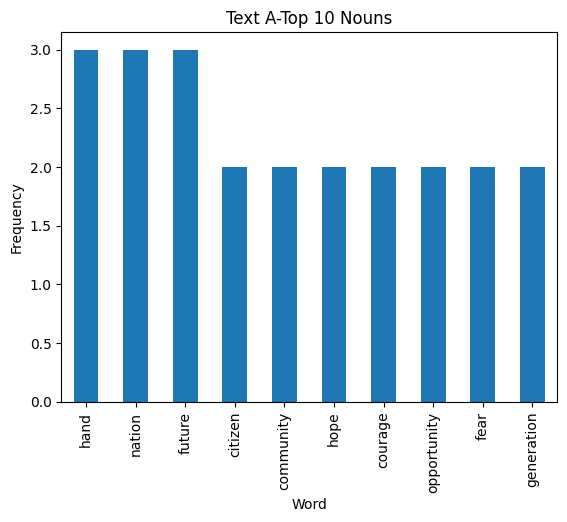

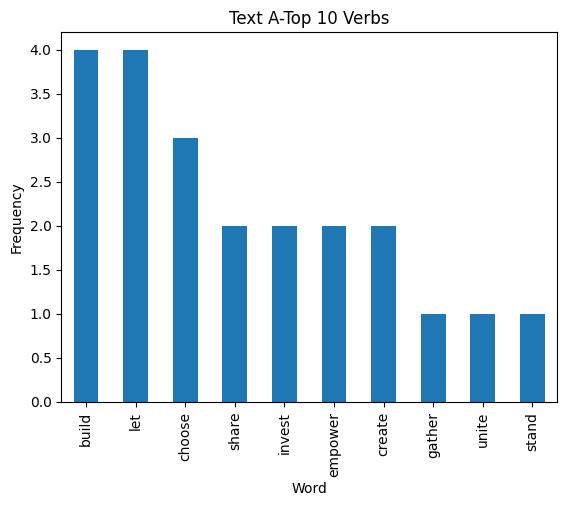

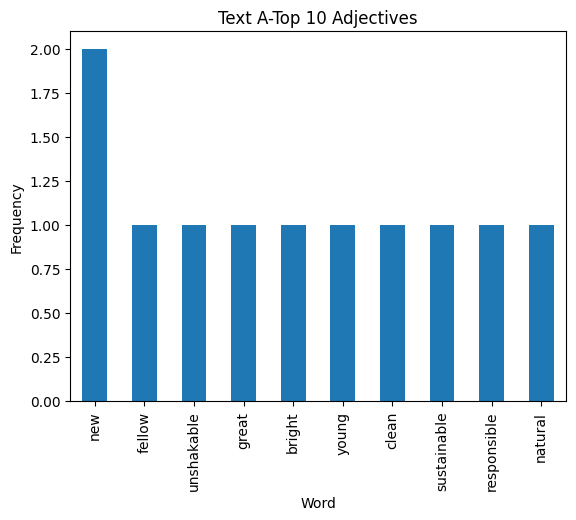

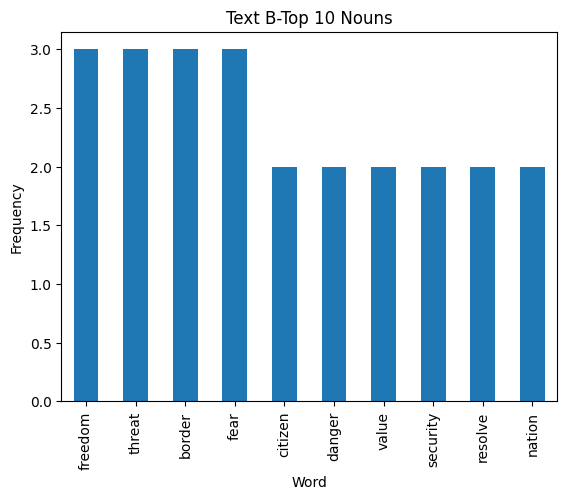

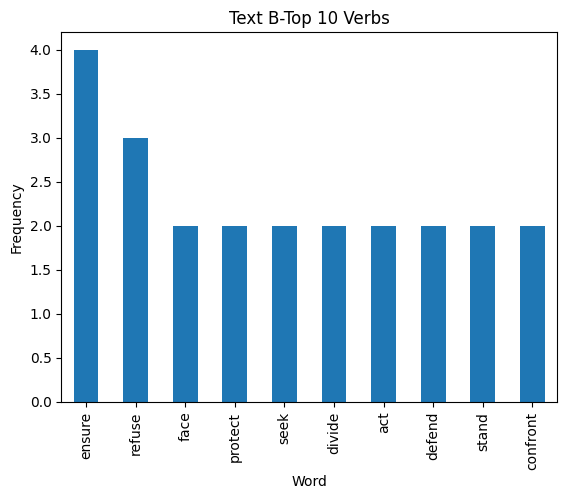

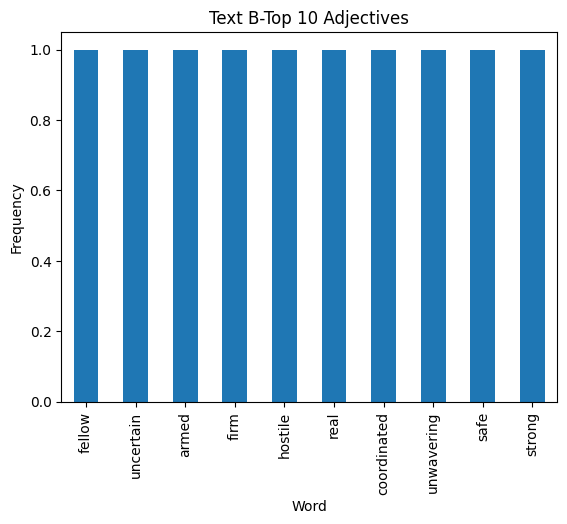

In [66]:
import spacy
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt

nlp = spacy.load("en_core_web_lg")

text_A = """My fellow citizens, today we gather not as strangers, but as a community united by our shared hopes and dreams.
We stand at the dawn of a new era—one built on innovation, cooperation, and the unshakable belief in the potential of our people.
The challenges before us are great, but so too is our courage and creativity.
We will invest in education, protect our planet, and empower every individual to shape their own destiny.

Let us build bridges, not walls; extend hands, not fists.
Together, we can create a nation where opportunity is not limited to the few, but shared by all.
Our strength lies not in fear, but in faith—in each other, in our values, and in the bright future we will create together.

Let this be the generation that chooses unity over division, progress over stagnation, and hope over despair.
Let this be the generation that dares to dream boldly, that embraces change, and that lifts one another up rather than tearing each other down.

We will work to expand access to healthcare, to ensure that no family has to choose between medicine and food.
We will support our teachers, invest in our children, and build schools that prepare every young mind for the world of tomorrow.
We will encourage clean energy, sustainable development, and responsible stewardship of the natural resources entrusted to us.

And above all, we will choose compassion—compassion for our neighbors, for our communities, and for those whose voices too often go unheard.
Our nation is strongest when every citizen feels seen, valued, and empowered.

Together, we will write a new chapter in our nation’s story—one defined not by fear or division, but by courage, unity, and purpose.
A future filled with opportunity is within our reach, and it is a future we will build hand in hand.
Let us move forward with confidence, with optimism, and with unwavering hope in all that we can achieve—together."""

text_B = """My fellow citizens, the world we face today is uncertain and full of danger.
Across the globe, our values are challenged, our security is tested, and our freedom is under threat.
We cannot afford complacency or hesitation.
We must strengthen our defenses, protect our borders, and ensure the safety of our families and our future.

Our enemies seek to divide us, to weaken our resolve, and to spread fear and chaos.
But we will not yield.
We will act with determination, discipline, and strength.
Every citizen has a role to play in defending our nation and preserving our way of life.

We must increase our vigilance, enhance our intelligence capabilities, and give our armed forces the tools they need to counter every threat.
We must stand firm against those who wish to undermine our democracy, whether they act from within or from beyond our borders.

Let us face the challenges before us with courage, and together ensure that the next generation inherits not fear, but freedom—not weakness, but resilience.
We will confront extremism wherever it appears.
We will push back against hostile powers seeking to disrupt our alliances.
We will safeguard our economy from manipulation and ensure that our industries cannot be exploited by those who do not share our values.

The dangers we confront are real, and they are growing.
Cyberattacks, disinformation campaigns, and coordinated acts of aggression threaten our stability.
We cannot ignore these warnings; we must respond with unity and unwavering resolve.

We will reinforce our border security, support law enforcement, and empower our military to defend every inch of our homeland.
We will stand shoulder to shoulder, refusing to be intimidated, refusing to be divided, and refusing to surrender to forces that thrive on fear.

Together, we will ensure that our nation remains safe, strong, and unbroken.
We will rise to meet every threat, overcome every obstacle, and protect the sacred freedoms that define us.
This is our duty, our responsibility, and our promise to all who come after us."""

def extract_top_words(text, n=10):
    doc = nlp(text)

    nouns = [token.lemma_ for token in doc if token.pos_ == 'NOUN' and not token.is_stop]
    verbs = [token.lemma_ for token in doc if token.pos_ == 'VERB' and not token.is_stop]
    adjectives = [token.lemma_ for token in doc if token.pos_ == 'ADJ' and not token.is_stop]

    noun_freq = Counter(nouns)
    verb_freq = Counter(verbs)
    adj_freq = Counter(adjectives)

    top_nouns = noun_freq.most_common(n)
    top_verbs = verb_freq.most_common(n)
    top_adjectives = adj_freq.most_common(n)

    return top_nouns, top_verbs, top_adjectives

top_nouns_A, top_verbs_A, top_adjs_A = extract_top_words(text_A)
top_nouns_B, top_verbs_B, top_adjs_B = extract_top_words(text_B)

df_nouns_A = pd.DataFrame(top_nouns_A, columns=['Noun', 'Frequency'])
df_verbs_A = pd.DataFrame(top_verbs_A, columns=['Verb', 'Frequency'])
df_adjs_A = pd.DataFrame(top_adjs_A, columns=['Adjective', 'Frequency'])

df_nouns_B = pd.DataFrame(top_nouns_B, columns=['Noun', 'Frequency'])
df_verbs_B = pd.DataFrame(top_verbs_B, columns=['Verb', 'Frequency'])
df_adjs_B = pd.DataFrame(top_adjs_B, columns=['Adjective', 'Frequency'])

print("Text A - Top 10 Nouns")
print(df_nouns_A)
print("\nText A - Top 10 Verbs")
print(df_verbs_A)
print("\nText A - Top 10 Adjectives")
print(df_adjs_A)

print("\nText B - Top 10 Nouns")
print(df_nouns_B)
print("\nText B - Top 10 Verbs")
print(df_verbs_B)
print("\nText B - Top 10 Adjectives")
print(df_adjs_B)

def plot_word_freq(df, title):
    df.set_index(df.columns[0], inplace=True)
    df.plot(kind='bar', legend=False)
    plt.title(title)
    plt.xlabel('Word')
    plt.ylabel('Frequency')
    plt.show()

plot_word_freq(df_nouns_A, "Text A-Top 10 Nouns")
plot_word_freq(df_verbs_A, "Text A-Top 10 Verbs")
plot_word_freq(df_adjs_A, "Text A-Top 10 Adjectives")

plot_word_freq(df_nouns_B, "Text B-Top 10 Nouns")
plot_word_freq(df_verbs_B, "Text B-Top 10 Verbs")
plot_word_freq(df_adjs_B, "Text B-Top 10 Adjectives")
